# Lecture 2, A "zero-dimensional" energy balance model of Earth's climate

In [ ]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## The Observed Global Energy Budget

```{note} Reminder
The global energy budget is the balance of energy coming into and going out of Earth, influenced mainly by the sun's radiation and Earth's reflective and absorptive properties.
```

### So, Why Does It Matter?

- **Climate Change Connection**: Alterations in the energy budget directly impact global warming and weather patterns. More greenhouse gases mean more trapped energy, leading to a hotter planet.

- **Real-world Consequences**:
    ```{margin} Quick Fact
    Energy imbalances are responsible for unpredictable climate events.
    ```
    - **Weather Events**: Such as powerful hurricanes and erratic rainfall.
    - **Melting Ice Caps**: Increased energy melts polar ice, raising sea levels and altering ocean currents.
    - **Biodiversity Risk**: Warmer regions put numerous species' habitats in danger.

- **The Role of Humans**: Our actions, like burning fossil fuels and clearing forests, modify the energy budget. This heightens greenhouse gas levels and planetary temperatures. Grasping the energy budget lets us evaluate our environmental impact and consider more sustainable practices.

```{figure} https://brian-rose.github.io/ClimateLaboratoryBook/_images/GlobalEnergyBudget.png
:height: 500px
:name: energy-budget
The global **annual mean** energy fluxes.
```

In upcoming exercises, we'll build a basic climate model grounded in this energy budget. But first, we need a simpler version of this budget.

```{prf:assumption} Climate Model Basics

Our rudimentary climate model can be expressed as

- **Heat Content Change** = 
    - $+$ Energy from the Sun's rays
    - $-$ Blackbody cooling to space
    - $+$ Radiation trapped due to human activities

These elements represent a global average, hence the term "zero-dimensional."
```



```{figure} https://raw.githubusercontent.com/hdrake/hdrake.github.io/master/figures/planetary_energy_balance.png
:height: 500px
:name: energy-balance
Planetary Energy Balance
```

```{note} How to build the model?
To make this simple conceptual model quantitative, we need a mathematical formulation for each of these four processes.
```


### 1.1 Absorbed solar radiation

At Earth's orbital distance from the Sun, the power of the Sun's rays that intercept the Earth is equal to


In [ ]:
S = 1368 # solar insolation [W/m^2]  (energy per unit time per unit area)

A small fraction

In [ ]:
alpha = 0.3 # albedo, or planetary reflectivity [unitless]

of this incoming solar radiation is reflected back out to space (by reflective surfaces like white clouds, snow, and ice), with the remaining fraction $(1-\alpha)$ being absorbed.

Since the incoming solar rays are all approximately parallel this far from the Sun, the cross-sectional area of the Earth that intercepts them is just a disc of area $\pi R^{2}$. Since all of the other terms we will consider act on the entire surface area $4\pi R^{2}$ of the spherical Earth, the absorbed solar radiation *per unit surface area* (averaged over the entire globe) is reduced by a factor of 4.

```{figure} https://www.open.edu/openlearn/ocw/pluginfile.php/101161/mod_oucontent/oucontent/890/639dcd57/ce3f1c3a/s250_3_002i.jpg
:height: 500px
:name: incoming-solar-radiation
Incoming solar ration
```

The absorbed solar radiation per unit area is thus
```{math}
\text{absorbed solar radiation} \equiv \frac{S(1-\alpha)}{4}
```

In [ ]:
def absorbed_solar_radiation(S=1368, alpha=0.3):
    return S*(1-alpha)/4

### 1.2 Outgoing Thermal Radiation
Assume that the Earth acts similarly to a blackbody radiator. If we consider the Earth's effective global mean emission temperature as $T_e$ then the relation is given by:

```{math}
OLR = \sigma T_e^4
```

In the above equation:
- $OLR$ stands for Outgoing Longwave Radiation
- $\sigma$ represents the Stefan-Boltzmann constant and has a value of $5.67\times 10^{-8} W m^{-2}K^{-4}$

From observational data, the average global annual value for $OLR$ is 238.5 W $m^{-2}$.

Given this value, we can rearrange the equation to find $T_e$:

```{math}
T_e = \frac{OLR}{\sigma}^{0.25}
```

```{exercise} Earth's Emission Temperature as a Blackbody Radiator
:label: earth-blackbody

Determine the value of $T_e$.

1. Compute the emission temperature $T_e$. 
2. Contrast this calculated value of $T_e$ with the real global mean surface temperature. Are they close?
3. Evaluate the validity of representing Earth's emission to space using the simple blackbody radiator model.
```


In [ ]:
Te = (238.5/(5.67*10**-8))**(0.25)
Te

254.66914551158553

The outgoing thermal radiation (blackbody cooling to space), denoted as $G(T)$, represents the combined effects of negative feedbacks that *dampen warming*, such as **blackbody radiation**, and positive feedbacks that *amplify warming*, such as the **water vapor feedback**.

Since these physics are too complicated to deal with here, we *linearize* the model by combining the incoming and the outgoing radiation.

We assume that the preindustrial world was in energy balance and thus that the equilibrium temperature aligns with the preindustrial temperature.

Consequently, our focus narrows down to just the first term of a Taylor Series expansion:

```{math}
G(T) \sim G(T_0) + G^{'}(T_0) (T-T_0)
```

around the pre-industrial equilibrium temperature $T_0$.

In [ ]:
T0 = 14. # preindustrial temperature [°C]

To simplify the expression, we define:

$$ A \equiv G(T_0) - G^{'}(T_0)T_0 $$
$$B \equiv - G^{'}(T_0) \text{       (the climate feedback parameter),}$$

which gives

$$ \text{outgoing thermal radiation} \equiv G(T) \sim A - BT$$

In [ ]:
def outgoing_thermal_radiation(T, A, B):
    return A-B*T

```{important} Value of the climate feedback parameter B
$B$ comes from a bottom-up estimate based on the best understanding of the various climate feedbacks (read more [here](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwikwbfrm9LsAhVjhuAKHQhZCm8QFjAEegQIAhAC&url=https%3A%2F%2Fclimateextremes.org.au%2Fwp-content%2Fuploads%2F2020%2F07%2FWCRP_ECS_Final_manuscript_2019RG000678R_FINAL_200720.pdf&usg=AOvVaw0hWIM3t4kJTovxoeobcRIN)).
```

In [ ]:
B = -1.3 # climate feedback parameter [W/m^2/°C],

```{note}

Since $B<0$, this tells us that the overall climate feedback is negative (i.e., stabilizing). Positive feedbacks cause $B$ to become less negative, reducing the efficiency with which Earth cools itself by radiating thermal energy to space and thus amplifying warming.
```

```{prf:assumption}
The value $A$ of is given by the definition of a preindustrial equilibrium, i.e., the fact that before human influence, Earth's energy budget was perfectly balanced:

$$\frac{S (1-\alpha)}{4} \equiv A - BT_0$$

```

By rearanging this equation, we find that the value of $A$ is given by

In [ ]:
A = absorbed_solar_radiation() + B*T0

In [ ]:
print(A)

221.2


### Human-caused greenhouse effect

Empirically, the greenhouse effect is known to be a logarithmic function of gaseous carbon dioxide ($CO_2$) concentrations

$$ \text{Human-caused greenhouse effect} = a * ln  \frac{CO_2}{CO_{2, PI}}  $$

where

In [ ]:
a = 5 # CO2 forcing coefficient [W/m^2]

In [ ]:
CO2_PI = 280 # preindustrial CO2 concentration [parts per million; ppm];

In [ ]:
def greenhouse_effect(CO2, a=5, CO2_PI=280):
    return a*np.log(CO2/CO2_PI)

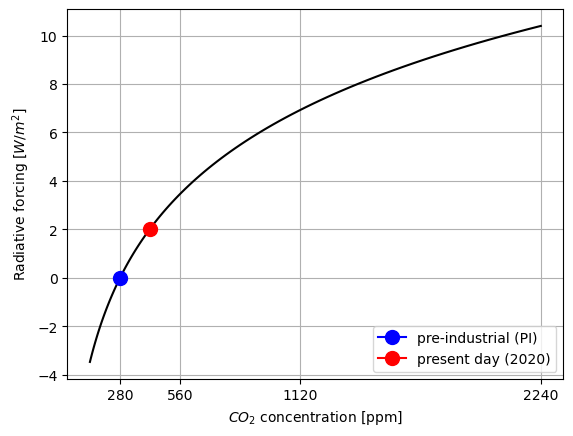

In [ ]:
co2_present = 420
co2_range = 280*2**np.linspace(-1,3,100)

plt.plot(co2_range, greenhouse_effect(co2_range), color = "black")
plt.ylabel('Radiative forcing [$W/m^2$]')
plt.xlabel('$CO_2$ concentration [ppm]')
plt.plot(CO2_PI, greenhouse_effect(CO2_PI), marker=".", markersize = 20, label = "pre-industrial (PI)", color = "blue")
plt.plot(co2_present, greenhouse_effect(co2_present), marker=".", markersize = 20, label = "present day (2020)", color = "red")
plt.xticks([280, 280*2, 280*4, 280*8])
plt.legend(loc = 4)
plt.grid()

### Observations from Mauna Loa Volcano

```{figure} https://i.pinimg.com/originals/df/1a/e7/df1ae72cfd5e6d0d535c0ec99e708f6f.jpg
:height: 500px
:name: volcano-mauna-loa
Mauna Loa Volcano
```

### 1.4) Change in heat content

The heat content $C_{temp}$ is determined by the temperature $T$ (in Kelvin) and the heat capacity of the climate system. While we are interested in the temperature of the atmosphere, which has a very small heat capacity, its heat is closely coupled with that of the upper ocean, which has a much larger heat capacity of

In [ ]:
C = 51 # atmosphere and upper-ocean heat capacity [J/m^2/°C]

```{prf:assumption} Constant heat-capacity
The change in heat content over time is given by 
$$\frac{d(C_{temp})}{dt}$$.

Since the heat capacity of seawater hardly changes with temperature, we can rewrite this in terms of the change in temperature with time

$$ \frac{d(C_{temp})}{dt} = C\frac{dT}{dt} $$
```

### 1.5) "zero-dimensional" climate model equation

Combining all of these subcomponent models, we write the governing equation of the "zero-dimensional" energy balance climate model as the Ordinary Differential Equation (ODE)

$$ C\frac{dT}{dt} = \frac{S (1-\alpha)}{4} - ( A - BT_0) + a * ln  \frac{CO_2}{CO{_2}_{PI}} $$

which determines the time evolution of Earth's globally-averaged surface temperature.

## 2) Numerical solution method and data structures

### 2.1) Discretization
The energy balance model equation above can be discretized in time as

$$ C\frac{T(t+\Delta t) - T(t)}{\Delta t} = \frac{S (1-\alpha)}{4} - ( A - BT_0) + a * ln  \frac{CO_2}{CO{_2}_{PI}} $$

Our finite difference equation, which results from a first-order truncation of the Taylor series expansion, approximates the exact ordinary differential equation above in the limit that $\Delta t \rightarrow 0$. In practice, we can keep decreasing $\Delta t$ until the solution converges within a tolerable error.

Hereafter, we use the subscript $n$ to denote the $n$-th timestep, where $T_{n+1} \equiv T(t_{n+1})$ denotes the temperature at the next timestep $t_{n+1} = t_n +\Delta t$.

By re-arranging the equation, we can solve for the temperature at the next timestep $n+1$  based on the known temperature at the present timestep $n$:

$$ T_{n+1} = T_n + \frac{\Delta t}{C} \bigg[\frac{S (1-\alpha)}{4} - ( A - BT_n) + a * ln  \frac{CO_2}{CO{_2}_{PI}}\bigg] $$

### 2.2) Timestepping
More generally, we recognize this equation to be of the form:

$$ T_{n+1} = T_n + \Delta t \cdot \text{tendency}(T_n; ...),$$

which we implement below (don't forget to update the time as well, $t_{n+1} = t_n + \Delta t$, which takes in an instance of our anticipated energy balance model EBM type as its only argument.

Calculate the tendency for 

$T_n$ = 15°C

$\Delta t$ = 1 [year]

In [ ]:
T_n = 15
deltat = 1
t = 0

tendency = 1. / C * (
            + absorbed_solar_radiation(alpha = alpha, S=S)
            - outgoing_thermal_radiation(T_n, A = A, B=B)
            + greenhouse_effect(280, a = a, CO2_PI=CO2_PI)
            )


Why is the tendency negative?

--> Calculate the temperature for the next timestep.

In [ ]:
T_n1 = T_n + deltat * tendency

Now think about how to calculate the temperature change for the next 150 years? What temperature do you expect after 150 years?

In [ ]:
T_n = np.zeros(150)
T_n[0] = 15

for year in range(1, 150):
    tendency = 1. / C * (
            + absorbed_solar_radiation(alpha = alpha, S=S)
            - outgoing_thermal_radiation(T_n[year-1], A = A, B=B)
            + greenhouse_effect(280, a = a, CO2_PI=CO2_PI)
            )
    T_n[year] = T_n[year-1] + deltat*tendency

Text(0.5, 0, 'Time [years]')

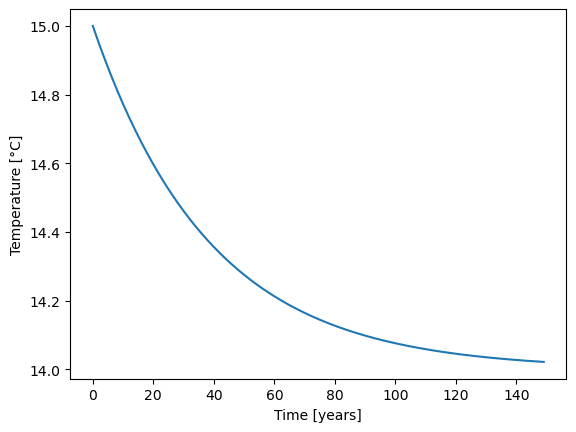

In [ ]:
plt.plot(T_n)
plt.ylabel("Temperature [°C]")
plt.xlabel("Time [years]")

Now we have everything ready. In the next step we will put this into a class called ebm:

In [ ]:
class EBM:
    """
    Zero Order Energy Balance Model (EBM)

    The Energy Balance Model (EBM) represents the balance between incoming solar radiation and outgoing thermal radiation.
    It also considers the greenhouse effect caused by CO2 levels. This model can simulate the temporal evolution of temperature 
    based on various parameters like albedo, solar constant, and greenhouse effect coefficients.

    Attributes:
    - T : Temperature (in Kelvin)
    - t : Time
    - deltat : Time step
    - CO2 : Carbon Dioxide function that returns CO2 levels in dependency of time t
    - C : Heat capacity
    - a : Greenhouse effect coefficient
    - A : Outgoing thermal radiation constant
    - B : Temperature sensitivity of outgoing radiation
    - CO2_PI : Pre-industrial CO2 concentration
    - alpha : Albedo
    - S : Solar constant
    """

    def __init__(self, T, t, deltat, CO2, C, a, A, B, CO2_PI, alpha, S):
        self.T = np.array(T)
        self.t = t
        self.deltat = deltat
        self.C = C
        self.a = a
        self.A = A
        self.B = B
        self.co2_pi = CO2_PI
        self.alpha = alpha
        self.S = S
        self.co2 = CO2

    def absorbed_solar_radiation(self, S, alpha):
        return (S*(1-alpha)/4)

    def outgoing_thermal_radiation(self, T, A, B):
        return A - B*T

    def greenhouse_effect(self, CO2, a=5, CO2_PI = 280):
        return a*np.log(CO2/CO2_PI)

    def tendency(self):
        current_T = self.T[-1] if self.T.size > 1 else self.T
        current_t = self.t[-1] if self.T.size > 1 else self.t
        
        return 1. / self.C * (
            + self.absorbed_solar_radiation(S=self.S, alpha=self.alpha)
            - self.outgoing_thermal_radiation(current_T, A=self.A, B=self.B)
            + self.greenhouse_effect(self.co2(current_t), a=self.a, CO2_PI=self.co2_pi)
        )

    @property
    def timestep(self):
        new_T = self.T[-1] + self.deltat * self.tendency() if self.T.size > 1 else self.T + self.deltat * self.tendency()
        new_t = self.t[-1] + self.deltat if self.T.size > 1 else self.t + self.deltat
        
        self.T = np.append(self.T, new_T)
        self.t = np.append(self.t, new_t)


### 2.4) Running simulations of the energy balance model

Let's define a function that runs an EBM simulation by timestepping forward until a given end_year.



In [ ]:
def run_model(model, end_year):
    for year in range(end_year):
        model.timestep

For example, let us consider the case where CO₂ emissions increase by 1% year-over-year from the preindustrial value [CO$_2$] = $280.0$ ppm, starting at T=T₀=14°C in year t=0 and with a timestep Δt = 1 year.

In [ ]:
def CO2_test(t, CO2_PI=280):
    return CO2_PI ** (1 + 1/100)**t

In [ ]:
model_parameters = {
    "T":T0,
    "t":0,
    "deltat":1,
    "CO2":CO2_test,
    "C":C,
    "a":a,
    "A":A,
    "B":B,
    "CO2_PI":280,
    "alpha":alpha,
    "S":S
}

```{note}

In Python, the ** syntax in a function call is used for unpacking key-value pairs from dictionaries directly into function arguments. This is particularly useful when working with functions that accept a variable number of keyword arguments.

In summary, ** in a function call is used to unpack dictionary items as keyword arguments.
```

In [ ]:
model = EBM(**model_parameters)

In [ ]:
model.timestep

In [ ]:
model.T

array([14., 14.])

## 3) Energy balance model applications
### 3.1) Why was Earth's preindustrial climate so stable?
Let us consider the simple case where CO₂ concentrations remain at their pre-industrial temperatures.

In [ ]:
def CO2_test(t):
    return 280

model_parameters["CO2"] = CO2_test

In [ ]:
model = EBM(**model_parameters)

In [ ]:
run_model(model, 200) 

Text(0, 0.5, 'temperature [°C]')

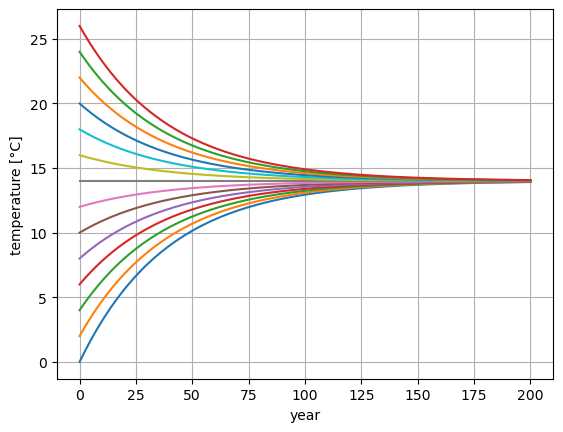

In [ ]:
t0s = np.arange(0,28,2)

for i in t0s:
    model_parameters["T"] = i
    model = EBM(**model_parameters)
    run_model(model, 200) 
    plt.plot(model.T)

plt.grid()
plt.xlabel("year")
plt.ylabel("temperature [°C]")

This figure shows that, no matter where we start out, the overall negative feedbacks ($B<0$) restore the temperature to the preindustrial equilibrum value of $T_0$ = 14.0 °C, over an exponential timescale of about 100 years.

### 3.2) Historical global warming fueled by greenhouse gas emissions

Human greenhouse gas emissions have fundamentally altered Earth's energy balance, moving us away from the stable preindustrial climate of the past few thousand years.

Since human CO₂ emissions are the main driver of global warming, we expect that if we plug historical CO₂ increases into our model ("forcing" it), we should roughly reproduce the observed historical global warming.

The observed increase of CO2 concentrations can be fairly accurately modelled by the simple cubic formula below.

In [ ]:
def co2_hist(t):
    return 280 * (1+ ((t-1850)/220)**3)

In [ ]:
model_parameters["CO2"] = co2_hist
model_parameters["T"] = T0
model_parameters["t"] = 1850
model = EBM(**model_parameters)

run_model(model, 170) 

In [ ]:
datapath = "data/graph.txt"
temp = pd.read_csv(datapath, header = None,
                   skiprows=5, index_col=0,
                   delimiter="     ")
temp = temp + 14.15

CO2_url = "data/monthly_in_situ_co2_mlo.csv"
co2_data = pd.read_csv(CO2_url, header = 58,skiprows=8, index_col=0) 
co2_data = co2_data.iloc[4:] 
co2_data = pd.to_numeric(co2_data.iloc[:,5]) 
co2_data[co2_data<= 0] = np.nan
co2_data.index = pd.to_datetime(co2_data.index, format='%Y')
co2_data = co2_data.groupby(co2_data.index.year).mean() 

/var/folders/38/z0l88jxs5cxc27_d0dp0r78c0000gn/T/ipykernel_38547/1054007210.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  temp = pd.read_csv(datapath, header = None,


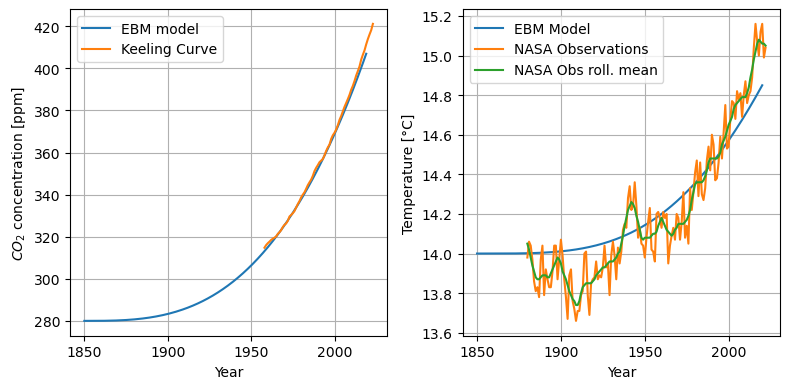

In [ ]:
f, (ax, bx) = plt.subplots(1,2, figsize=(8,4))
ax.plot(np.arange(1850, 2020), co2_hist(np.arange(1850, 2020)), label = "EBM model")
ax.plot(co2_data.index, co2_data.values, label="Keeling Curve")
ax.set_ylabel("$CO_2$ concentration [ppm]")
ax.grid()
ax.set_xlabel("Year")
ax.legend()


bx.plot(np.arange(1850, 2021), model.T, label="EBM model")
temp.plot(ax = bx)
bx.set_ylabel("Temperature [°C]")
bx.grid()
bx.legend(["EBM Model", "NASA Observations", "NASA Obs roll. mean"])
bx.set_xlabel("Year")

f.tight_layout()

```{warning} CO<sub>2</sub> Emissions: Beyond Trend Predictions to Climate Noise

While CO<sub>2</sub> emissions can be used to predict the overarching trend in climate, we must also consider the inherent climate noise present in observations. This noise doesn't arise from instrumental inaccuracies but represents genuine signals from the Earth's natural variability.

Such natural fluctuations are mainly attributed to the turbulent and chaotic fluid dynamics of both the atmosphere and the ocean. We will delve deeper into this topic in **Lecture 4**. The dynamics are visually represented in the following illustrations:
```

[![Video Thumbnail](https://img.youtube.com/vi/oRsY_UviBPE/maxresdefault.jpg)](https://youtu.be/oRsY_UviBPE)


Now that we've convinced ourselves that the model accurately reproduces historical warming, we can use it to project how much warming we might expect due to future CO₂ emissions.

### 3.3) Best- and worst-case projections of future global warming

Consider two divergent hypothetical futures:

1) a low-emissions world in which emissions decrease such that CO2 concentrations stay below 500 ppm by 2100 (known in climate circles as "RCP2.6") and

2) a high-emissions world in which emissions continue increasing and CO2 concentrations soar upwards of 1200 ppm ("RCP8.5").

In [ ]:
def CO2_RCP26(t):
    return 280 * (1+ ((t-1850)/220)**3 * np.minimum(1., np.exp(-((t-1850)-170)/100)))
def CO2_RCP85(t):
    return 280 * (1+ ((t-1850)/220)**3 * np.maximum(1., np.exp(((t-1850)-170)/100)))

In the low-emissions scenario, the temperature increase stays below $\Delta T$ = 2 °C by 2100, while in the high-emissions scenario temperatures soar upwards of 3.5ºC above pre-industrial levels.

In [ ]:
model_parameters["CO2"] = CO2_RCP26
model1 = EBM(**model_parameters)

model_parameters["CO2"] = CO2_RCP85
model2 = EBM(**model_parameters)

run_model(model1, 249) 
run_model(model2, 249) 

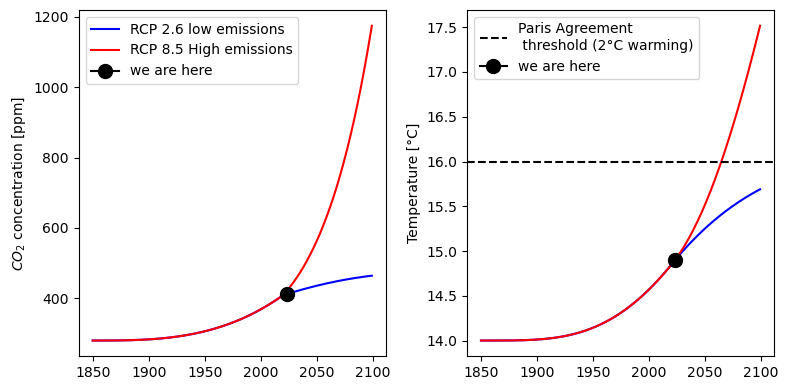

In [ ]:
f, (ax, bx) = plt.subplots(1,2, figsize = (8,4))

ax.plot(np.arange(1850, 2100), CO2_RCP26(np.arange(1850,2100)), 
        color = "Blue", label = "RCP 2.6 low emissions")
ax.plot(np.arange(1850, 2100), CO2_RCP85(np.arange(1850,2100)),
        color = "Red", label = "RCP 8.5 High emissions")
ax.plot(2023, CO2_RCP26(2023), marker=".",
        markersize = 20, label = "we are here", color = "black")
ax.set_ylabel("$CO_2$ concentration [ppm]")
ax.legend()

bx.plot(np.arange(1850, 2100), model1.T, color = "Blue")
bx.plot(np.arange(1850, 2100), model2.T,  color = "Red")
bx.axhline(y = 16, label = "Paris Agreement\n threshold (2°C warming)",
           ls="--", color = "black")
bx.set_ylabel("Temperature [°C]")
bx.plot(2023, model1.T[173], marker=".", 
         markersize = 20, label = "we are here", color = "black")
bx.legend()

f.tight_layout()

```{note}
A big thank you to [Henri Drake](https://github.com/hdrake) for the insightful lecture!

The content is sourced from the MIT course titled [Introduction to Computational Thinking](https://computationalthinking.mit.edu/Fall20/lecture20/). This course is structured around the [Julia programming language](http://www.julialang.org/). 

The original code corresponding to this lecture is available on GitHub: [simplEarth/1_energy_balance_model.jl](https://github.com/hdrake/simplEarth/blob/master/1_energy_balance_model.jl).

Additionally, some content has been adapted from [Brian Rose's Climate Laboratory Book](https://brian-rose.github.io/ClimateLaboratoryBook/courseware/).
```
